In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Correlation

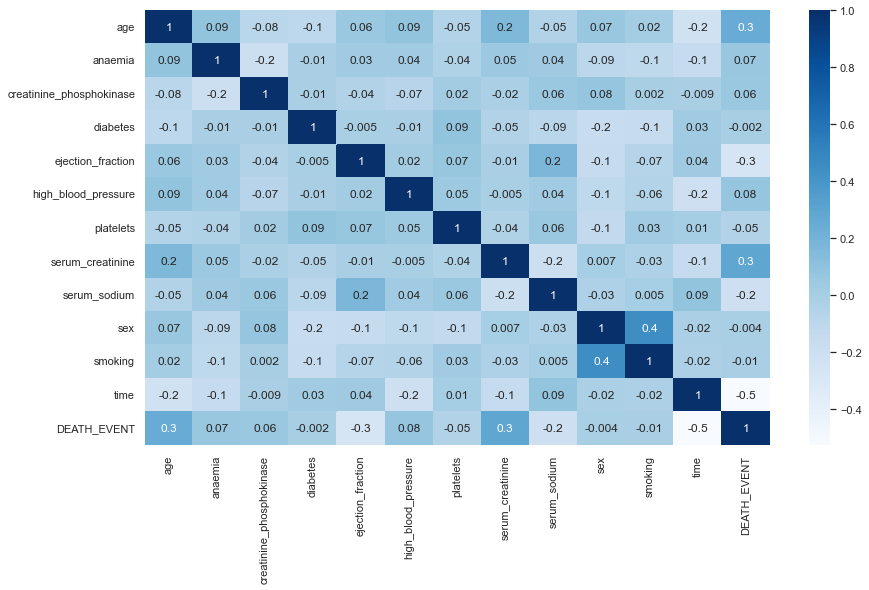

In [4]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

### Feature Importance

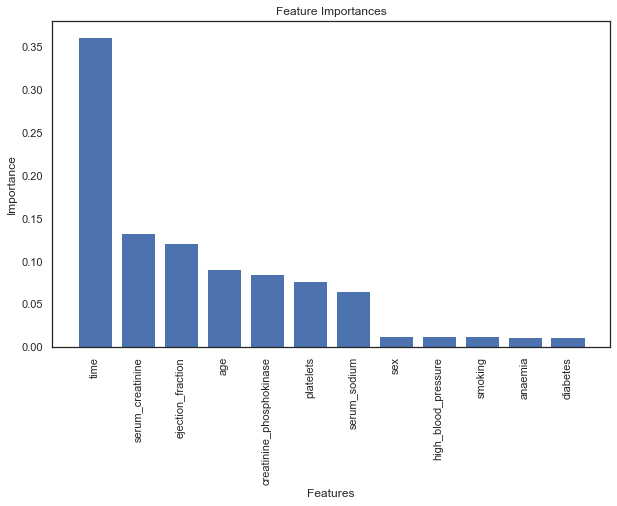

In [5]:
# Split the data into features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Create a random forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances from the model
importances = model.feature_importances_

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Get the feature names
names = [X.columns[i] for i in indices]

# Create a bar chart of feature importances
plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Without SMOTE

In [7]:
df = pd.read_csv('output/without_smote.csv')

numeric_cols = df.select_dtypes(include=[np.number])
cmap = sns.light_palette('navy', as_cmap=True)
highlight = pd.DataFrame('', index=df.index, columns=df.columns)
for col in numeric_cols.columns:
    idxmax = df[col].idxmax()
    highlight.at[idxmax, col] = 'background-color: red'


combined = df.style.background_gradient(cmap=cmap).apply(lambda x: highlight, axis=None)
display(combined)

,Models,Accuracy,Precision,Recall,F1-score
0,AB,0.766000,0.739000,0.680000,0.708000
1,DT,0.866000,1.000000,0.600000,0.750000
2,ET,0.816000,0.818000,0.500000,0.620000
3,G-NB,0.850000,0.750000,0.600000,0.667000
4,GB,0.900000,0.764000,0.866000,0.812000
5,LR,0.816000,0.500000,0.636000,0.560000
6,RF,0.833000,0.785000,0.611000,0.687500


### With SMOTE

In [9]:
df = pd.read_csv('output/with_smote.csv')

numeric_cols = df.select_dtypes(include=[np.number])
cmap = sns.light_palette('navy', as_cmap=True)
highlight = pd.DataFrame('', index=df.index, columns=df.columns)
for col in numeric_cols.columns:
    idxmax = df[col].idxmax()
    highlight.at[idxmax, col] = 'background-color: red'


combined = df.style.background_gradient(cmap=cmap).apply(lambda x: highlight, axis=None)
display(combined)

,Models,Accuracy,Precision,Recall,F1-score
0,AB,0.914000,0.853000,0.972000,0.909000
1,DT,0.829000,0.842000,0.800000,0.820000
2,ET,0.878000,0.877000,0.914000,0.895000
3,G-NB,0.829000,0.853000,0.813000,0.833000
4,GB,0.853000,0.880000,0.840000,0.860000
5,LR,0.865000,0.871000,0.850000,0.860000
6,RF,0.914000,0.926000,0.904000,0.915000


### With SMOTE and important features

In [10]:
df = pd.read_csv('output/with_smote_and_important_features.csv')

numeric_cols = df.select_dtypes(include=[np.number])
cmap = sns.light_palette('navy', as_cmap=True)
highlight = pd.DataFrame('', index=df.index, columns=df.columns)
for col in numeric_cols.columns:
    idxmax = df[col].idxmax()
    highlight.at[idxmax, col] = 'background-color: red'


combined = df.style.background_gradient(cmap=cmap).apply(lambda x: highlight, axis=None)
display(combined)

,Models,Accuracy,Precision,Recall,F1-score
0,AB,0.914000,0.900000,0.923000,0.911000
1,DT,0.841000,0.794000,0.861000,0.826000
2,ET,0.890000,0.875000,0.897000,0.886000
3,G-NB,0.865000,0.864000,0.842000,0.853000
4,GB,0.914000,0.926000,0.904000,0.915000
5,LR,0.841000,0.840000,0.860000,0.850000
6,RF,0.853000,0.875000,0.833000,0.853000
